<a href="https://www.kaggle.com/code/rajonnachoudhury/ad-lab6?scriptVersionId=293048416" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 


In [2]:
df=pd.read_csv("/kaggle/input/house-price-prediction-dataset/house_prices_dataset.csv")
df

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903
...,...,...,...,...,...
9995,2650.551032,7,9,18.126034,431344.267823
9996,1000.827516,2,53,24.479692,6650.271134
9997,1647.341638,5,80,2.189312,233698.384301
9998,2247.882787,6,73,27.931014,280766.827379


In [3]:
df.isnull().sum()

square_feet             0
num_rooms               0
age                     0
distance_to_city(km)    0
price                   0
dtype: int64

In [4]:
df.drop(columns=['age'],inplace=True)

In [5]:
df=df.round(2)
df

,square_feet,num_rooms,distance_to_city(km),price
0,2248.36,3,23.00,200374.09
1,1930.87,2,13.98,268784.85
2,2323.84,6,21.50,315020.86
3,2761.51,3,10.34,355111.47
4,1882.92,7,25.49,234197.12
...,...,...,...,...
9995,2650.55,7,18.13,431344.27
9996,1000.83,2,24.48,6650.27
9997,1647.34,5,2.19,233698.38
9998,2247.88,6,27.93,280766.83


In [6]:
df.head(5)

,square_feet,num_rooms,distance_to_city(km),price
0,2248.36,3,23.00,200374.09
1,1930.87,2,13.98,268784.85
2,2323.84,6,21.50,315020.86
3,2761.51,3,10.34,355111.47
4,1882.92,7,25.49,234197.12


In [7]:
#feature 1
X=df[['square_feet']]
y=df[['price']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred=model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2) #weak model, since we are only using one feature

MSE: 4104994554.1057873
R2 Score: 0.5757771150313387


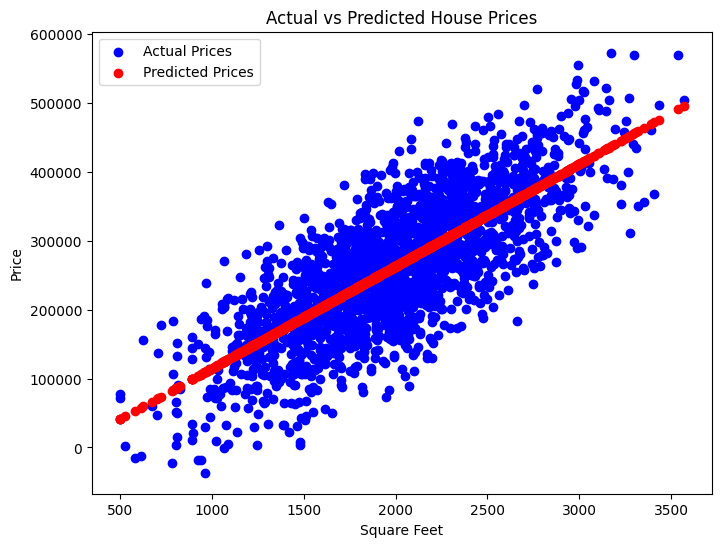

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label="Actual Prices")
plt.scatter(X_test, y_pred, color='red', label="Predicted Prices")
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()